In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [1]:
import os
from glob import glob

import numpy as np
import random
import cv2
import matplotlib.pyplot as plt
from matplotlib import patches
import seaborn as sns

from sklearn.metrics import confusion_matrix

from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D, BatchNormalization, LeakyReLU
from keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint

In [2]:
!git clone https://github.com/lokesh2503/Fusar-classification.git

fatal: destination path 'Fusar-classification' already exists and is not an empty directory.


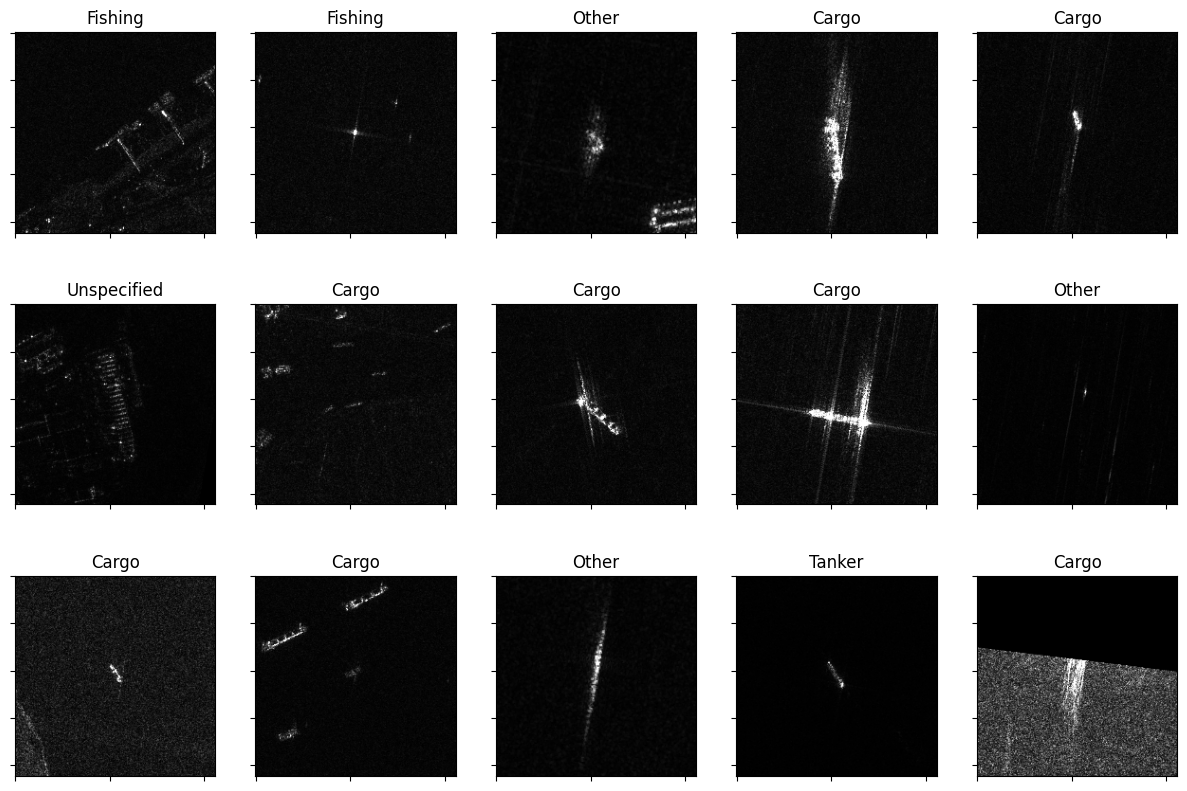

In [3]:
# Set basepath
basepath = "/content/Fusar-classification/sample/Train"

# Generate a list of files for each class
files_list_cargo = glob(os.path.join(basepath, "Cargo/*"))
files_list_fishing = glob(os.path.join(basepath, "Fishing/*"))
files_list_tanker = glob(os.path.join(basepath, "Other/*"))
files_list_other = glob(os.path.join(basepath, "Tanker/*"))
files_list_unspecified = glob(os.path.join(basepath, "Unspecified/*"))

# Open the files
images = []
labels = []
text_labels = ['Cargo', 'Fishing', 'Other', 'Tanker', 'Unspecified']

for file in files_list_cargo:
    img_path = os.path.join(basepath, file)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (212, 212))
    images.append(img)
    labels.append(0)

for file in files_list_fishing:
    img_path = os.path.join(basepath, file)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (212, 212))
    images.append(img)
    labels.append(1)

for file in files_list_tanker:
    img_path = os.path.join(basepath, file)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (212, 212))
    images.append(img)
    labels.append(2)

for file in files_list_other:
    img_path = os.path.join(basepath, file)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (212, 212))
    images.append(img)
    labels.append(3)

for file in files_list_unspecified:
    img_path = os.path.join(basepath, file)
    img = cv2.imread(img_path)
    img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, (212, 212))
    images.append(img)
    labels.append(4)

images = np.array(images, dtype=np.int64)
labels = np.array(labels, dtype=np.int64)

# Split the data into train (70%), validation (20%) and test (10%) datasets
np.random.seed(27)
np.random.shuffle(images)

np.random.seed(27)
np.random.shuffle(labels)

train = int(0.7*len(images))
validation = int(0.2*len(images))
test = int(0.1*len(images))

X_train, y_train = images[:train], labels[:train]
X_validation, y_validation = images[train:(validation+train)], labels[train:(validation+train)]
X_test, y_test = images[(validation+train):], labels[(validation+train):]

n_classes = 5

# Change the labels from categorical to one-hot encoding, i.e., class '1' transforms into vector [0, 1]
y_train = to_categorical(y_train, n_classes)
y_validation = to_categorical(y_validation, n_classes)
y_test = to_categorical(y_test, n_classes)

# Plot some sample images
n_rows = 3
n_cols = 5

plt.figure(figsize=(15, 10))
for i in range(n_rows*n_cols):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    index = random.randint(0, len(X_train) - 1)
    plt.imshow(X_train[index])
    plt.title(text_labels[np.argmax(y_train[index])])


In [4]:
# Define the Neural Network
model = Sequential()

model.add(Conv2D(32, (3, 3), activation='linear', input_shape = (212, 212, 3), padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(64, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(128, (3, 3), activation='linear', padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Conv2D(256, (3, 3), activation='linear',padding='same'))
model.add(LeakyReLU(alpha=0.1))
model.add(MaxPooling2D((2, 2), padding='same'))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Flatten())

model.add(Dense(256, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Dense(64, activation='linear'))
model.add(LeakyReLU(alpha=0.1))
model.add(Dropout(0.25))
model.add(BatchNormalization())

model.add(Dense(n_classes, activation='softmax'))

model.summary()


Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 212, 212, 32)      896       
                                                                 
 leaky_re_lu (LeakyReLU)     (None, 212, 212, 32)      0         
                                                                 
 max_pooling2d (MaxPooling2D  (None, 106, 106, 32)     0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 106, 106, 32)      0         
                                                                 
 batch_normalization (BatchN  (None, 106, 106, 32)     128       
 ormalization)                                                   
                                                                 
 conv2d_1 (Conv2D)           (None, 106, 106, 64)      1

In [5]:
# Compile and fit the NN
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
checkpoint = ModelCheckpoint("fusar_classification.keras", monitor='val_accuracy', verbose=1, save_best_only=True, mode='max')
history = model.fit(X_train, y_train, batch_size=8, epochs=12, verbose=1, validation_data=(X_validation, y_validation), callbacks=[checkpoint])


Epoch 1/12
413/413 [==============================] - ETA: 0s - loss: 1.3058 - accuracy: 0.5271
Epoch 1: val_accuracy improved from -inf to 0.64157, saving model to fusar_classification.keras
413/413 [==============================] - 655s 2s/step - loss: 1.3058 - accuracy: 0.5271 - val_loss: 0.9897 - val_accuracy: 0.6416
Epoch 2/12
413/413 [==============================] - ETA: 0s - loss: 1.0652 - accuracy: 0.6053
Epoch 2: val_accuracy did not improve from 0.64157
413/413 [==============================] - 624s 2s/step - loss: 1.0652 - accuracy: 0.6053 - val_loss: 1.0148 - val_accuracy: 0.6193
Epoch 3/12
413/413 [==============================] - ETA: 0s - loss: 1.0009 - accuracy: 0.6128
Epoch 3: val_accuracy improved from 0.64157 to 0.68505, saving model to fusar_classification.keras
413/413 [==============================] - 633s 2s/step - loss: 1.0009 - accuracy: 0.6128 - val_loss: 0.8431 - val_accuracy: 0.6850
Epoch 4/12
413/413 [==============================] - ETA: 0s - loss: 

In [6]:
# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=1)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

15/15 [==============================] - 22s 1s/step - loss: 0.6329 - accuracy: 0.7548
Test Loss: 0.6328687071800232
Test Accuracy: 0.7547568678855896


In [7]:
# Show accuracy and loss plots of the model
accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(len(accuracy))

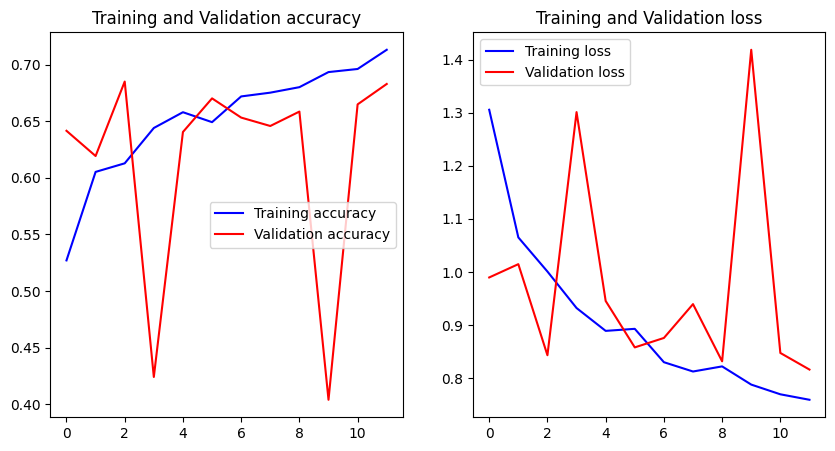

In [8]:
plt.figure(figsize=(10,5))
ax = plt.subplot(1, 2, 1)
plt.plot(epochs, accuracy, 'b', label='Training accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation accuracy')
plt.title('Training and Validation accuracy')
plt.legend()

ax = plt.subplot(1, 2, 2)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Training and Validation loss')
plt.legend()
plt.show()


In [9]:
# Obtain predictions
predicted_class = model.predict(X_test)

predicted_class_probability = np.max(predicted_class, axis=1)*100
predicted_class = np.argmax(predicted_class, axis=1)
true_class = np.argmax(y_test, axis=1)

correct = []
incorrect = []

for i in range(len(predicted_class)):
    if predicted_class[i] == true_class[i]:
        correct.append(i)
    else:
        incorrect.append(i)

print('Correct predictions: ', len(correct))
print('Incorrect predictions: ', len(incorrect))

15/15 [==============================] - 22s 1s/step
Correct predictions:  357
Incorrect predictions:  116


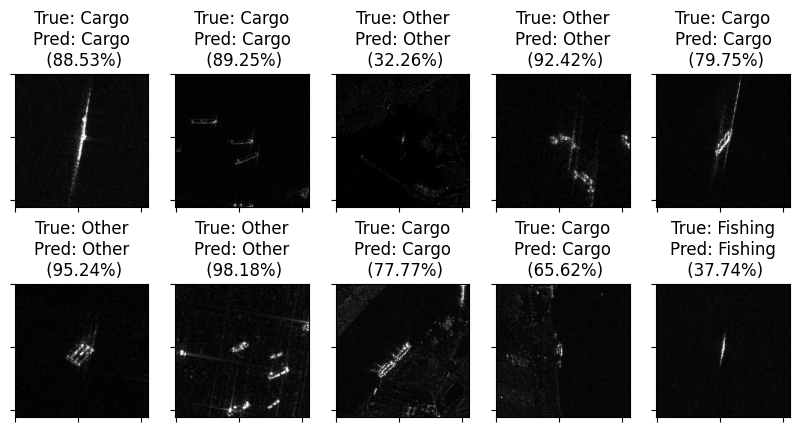

In [10]:
random.shuffle(correct)
random.shuffle(incorrect)

# Show some CORRECT PREDICTIONS
n_rows = 2
n_cols = 5

plt.figure(figsize=(10, 5))
for i in range(n_rows*n_cols):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.imshow(X_test[correct[i]], cmap=plt.get_cmap('gray'))
    plt.title('True: ' + str(text_labels[true_class[correct[i]]]) +
              '\nPred: ' + str(text_labels[predicted_class[correct[i]]]) +
              '\n' + " (%.2f%%)" % predicted_class_probability[correct[i]])


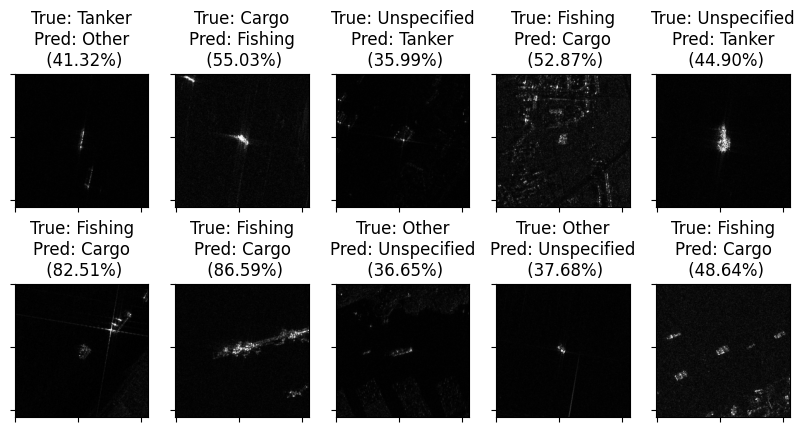

In [14]:
# Show the INCORRECT PREDICTIONS
n_rows = 2
n_cols = 5

plt.figure(figsize=(10,5))
for i in range(n_rows*n_cols):
    ax = plt.subplot(n_rows, n_cols, i + 1)
    ax.set_yticklabels([])
    ax.set_xticklabels([])
    plt.imshow(X_test[incorrect[i]], cmap=plt.get_cmap('gray'))
    plt.title('True: ' + str(text_labels[true_class[incorrect[i]]]) +
              '\nPred: ' + str(text_labels[predicted_class[incorrect[i]]]) +
              '\n' + " (%.2f%%)" % predicted_class_probability[incorrect[i]])

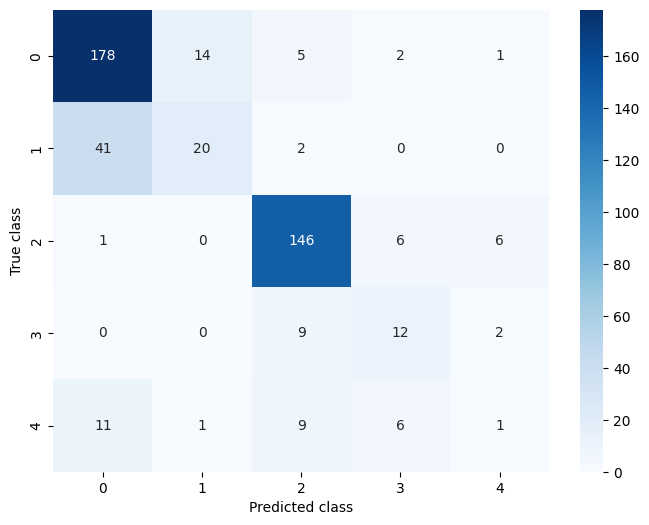

In [15]:
# Show confussion Matrix
cm = confusion_matrix(true_class, predicted_class)
plt.subplots(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt=".0f", cmap='Blues')
plt.xlabel("Predicted class")
plt.ylabel("True class")
plt.show()

Step 0 of 15
Step 1 of 15
Step 2 of 15
Step 3 of 15
Step 4 of 15
Step 5 of 15
Step 6 of 15
Step 7 of 15
Step 8 of 15
Step 9 of 15
Step 10 of 15
Step 11 of 15
Step 12 of 15
Step 13 of 15
Step 14 of 15


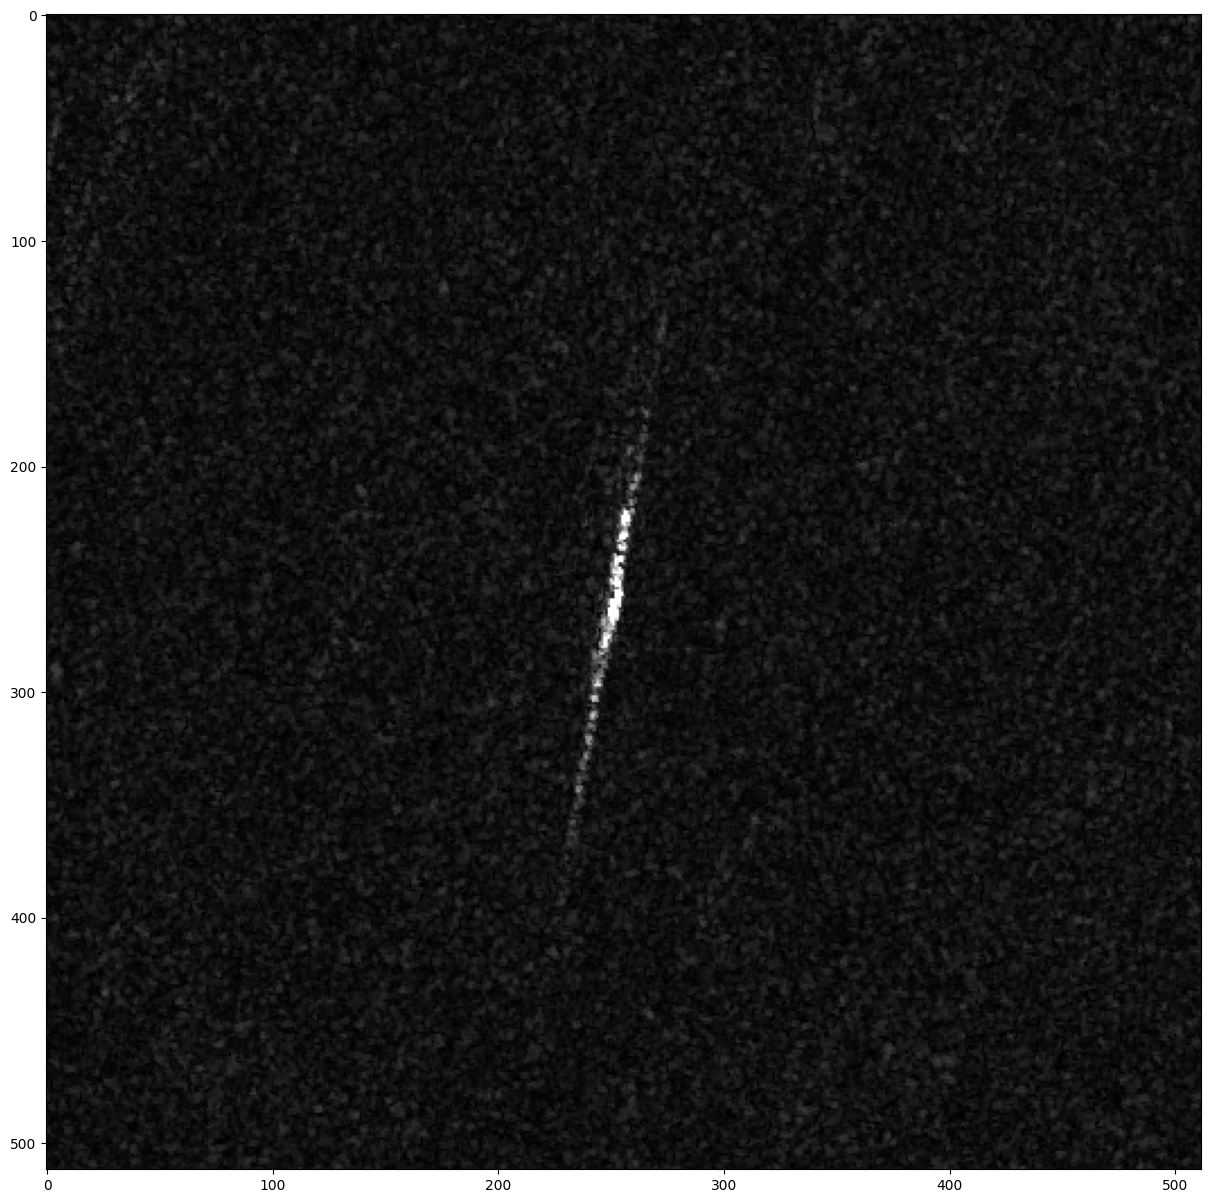

In [17]:
# Load and show scene
basepath = "/content/Fusar-classification/sample/Test/Fishing"
stride = 20

scene_list = glob(os.path.join(basepath, "Ship_C04S02N0544.tiff*"))
scene_file = scene_list[0]

img = cv2.imread(scene_file)
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
height, width, _ = img.shape

plt.figure(figsize=(15, 15))
ax = plt.subplot(1, 1, 1)
ax.imshow(img)

# Obtain predictions in 80x80 boxes inside scene
for h in range(0, height-212, stride):
    print("Step", int(h/stride), "of", int((height-212)/stride))

    for w in range(0, width-212, stride):
        img_box = []
        img_box.append(img[h:h+212, w:w+212])
        img_box = np.array(img_box, dtype=np.int64)

        prediction = model.predict(img_box, verbose=False)
        prediction_probability = np.max(prediction)
        prediction_class = np.argmax(prediction)

        if (prediction_class == 1 and prediction_probability > 0.95):
            ax.add_patch(patches.Rectangle((w, h), 212, 212, edgecolor='r', facecolor='none'))

plt.show()

In [18]:
from sklearn.metrics import confusion_matrix

# ...

# Evaluate the model
score = model.evaluate(X_test, y_test, verbose=1)
print('Test Loss:', score[0])
print('Test Accuracy:', score[1])

# Predict the classes for the test data
y_pred = model.predict_classes(X_test)

# Print the confusion matrix
cm = confusion_matrix(y_test, y_pred)
print('Confusion Matrix:')
print(cm)

# Print the class-wise accuracy
class_accuracy = np.diag(cm) / np.sum(cm, axis=1)
print('Class-wise Accuracy:')
print(class_accuracy)

15/15 [==============================] - 21s 1s/step - loss: 0.6329 - accuracy: 0.7548
Test Loss: 0.6328687071800232
Test Accuracy: 0.7547568678855896


AttributeError: 'Sequential' object has no attribute 'predict_classes'

In [19]:
# Print the confusion matrix
cm = confusion_matrix(y_train, y_pred)
print('Training Confusion Matrix:')
print(cm)

# Print the class-wise accuracy
class_accuracy = np.diag(cm) / np.sum(cm, axis=1)
print('Class-wise Accuracy:')
print(class_accuracy)

NameError: name 'y_pred' is not defined